In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Modeling prior predictive distribution**

In [20]:

prior = CmdStanModel(stan_file='prior.stan')

INFO:cmdstanpy:compiling stan file /home/Volume_for_docker/Lab3/prior.stan to exe file /home/Volume_for_docker/Lab3/prior
INFO:cmdstanpy:compiled model executable: /home/Volume_for_docker/Lab3/prior


In [21]:
sampled_prior = prior.sample(fixed_param=True, iter_sampling=1000)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [22]:
df_prior = sampled_prior.draws_pd()  # Creates Pandas Dataframe
df_prior.head()

,lp__,accept_stat__,N,y,p
0,0.0,0.0,50.0,10.0,0.156920
1,0.0,0.0,50.0,8.0,0.125967
2,0.0,0.0,50.0,12.0,0.190982
3,0.0,0.0,50.0,1.0,0.073392
4,0.0,0.0,50.0,19.0,0.379257


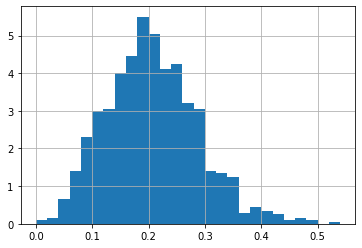

In [37]:
df_prior_ratio = df_prior["y"] / df_prior["N"]

df_prior_ratio.hist(bins='auto', density=True)
plt.show()

In [60]:
prior_mean = df_prior_ratio.mean()
print(f'Expected value of predicted ratio is equal to {prior_mean}')

Expected value of predicted ratio is equal to 0.19664000000000004


The expected value of predicted ratio is around 0,2 and it matches with given prior knowledge.

**Modeling posterior and posterior predictive distribution**

In [26]:
posterior = CmdStanModel(stan_file='posterior.stan')

INFO:cmdstanpy:compiling stan file /home/Volume_for_docker/Lab3/posterior.stan to exe file /home/Volume_for_docker/Lab3/posterior
INFO:cmdstanpy:compiled model executable: /home/Volume_for_docker/Lab3/posterior


In [27]:
# Data
N = 50
y = 7

sampled_posterior = posterior.sample(data={'N':N, 'y':y})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed

INFO:cmdstanpy:CmdStan done processing.


In [28]:
df_posterior = sampled_posterior.draws_pd()  # Creates Pandas Dataframe
df_posterior.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p,y_pred
0,-41.1140,0.297353,1.23294,1.0,1.0,0.0,42.8273,0.211058,14.0
1,-41.9790,0.901687,1.23294,2.0,3.0,0.0,41.9902,0.107584,7.0
2,-42.3408,0.922120,1.23294,1.0,1.0,0.0,42.6273,0.101528,4.0
3,-42.2890,1.000000,1.23294,1.0,1.0,0.0,42.7602,0.102341,5.0
4,-41.0338,1.000000,1.23294,1.0,1.0,0.0,41.9775,0.130488,9.0


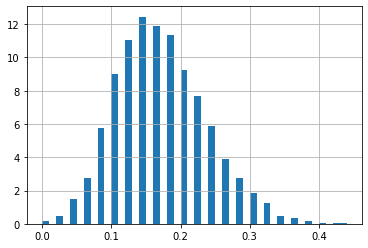

In [36]:
df_posterior_ratio = df_posterior["y_pred"] / N

df_posterior_ratio.hist(bins='auto', density=True)
plt.show()

In [45]:
posterior_ratio_mean = df_posterior_ratio.mean()
posterior_ratio_mean

0.16677000000000003

In [46]:
posterior_ratio_interval_94 = az.hdi(np.array(df_posterior_ratio))
posterior_ratio_interval_94

array([0.06, 0.3 ])

In [47]:
posterior_p_value = df_posterior["p"]
posterior_p_mean = posterior_p_value.mean()
posterior_p_mean

0.1673524813

In [53]:
posterior_p_interval_94 = az.hdi(np.array(posterior_p_value))
posterior_p_interval_94

array([0.0960555, 0.238751 ])

In [49]:
print(f'Expected value of predicted ratio is equal to {posterior_ratio_mean}')
print(f'Expected value of p value is equal to {posterior_p_mean}')
print(f'94% density interval of predicted ratio is equal to {posterior_ratio_interval_94}')
print(f'94% density interval p value is equal to {posterior_p_interval_94}')

Expected value of predicted ratio is equal to 0.16677000000000003
Expected value of p value is equal to 0.1673524813
94% density interval of predicted ratio is equal to [0.06 0.3 ]
94% density interval p value is equal to [0.0960555 0.238751 ]


In [59]:
vaccine_prob = (df_posterior_ratio < 0.2).sum() / df_posterior_ratio.shape[0]

print(f'The probability that ratio is lower than the average probability from traditional vaccines is equal to {vaccine_prob}')

The probability that ratio is lower than the average probability from traditional vaccines is equal to 0.664


**Summary**

Whole laboratory was a good introduction to prior and posterior predictive distrubution. I could apply it on simple task and see the influence of those methods.